In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 2.6 MB/s 
     |████████████████████████████████| 9.8 MB 39.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import keras
import pmdarima as pm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rishiraj-cs/Datasets/master/Apple_stock.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-03-31,27.475000,27.219999,27.430000,27.247499,103553600.0,25.343138
1,2016-04-01,27.500000,27.049999,27.195000,27.497499,103496000.0,25.575666
2,2016-04-04,28.047501,27.567499,27.605000,27.780001,149424800.0,25.838421
3,2016-04-05,27.682501,27.355000,27.377501,27.452499,106314800.0,25.533810
4,2016-04-06,27.745001,27.299999,27.557501,27.740000,105616400.0,25.801216
...,...,...,...,...,...,...,...
1255,2021-03-25,121.660004,119.000000,119.540001,120.589996,98844700.0,120.589996
1256,2021-03-26,121.480003,118.919998,120.349998,121.209999,93958900.0,121.209999
1257,2021-03-29,122.580002,120.730003,121.650002,121.389999,80819200.0,121.389999
1258,2021-03-30,120.400002,118.860001,120.110001,119.900002,85671900.0,119.900002


In [3]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [4]:
from statsmodels.tsa.stattools import adfuller

Text(0, 0.5, 'CLOSE')

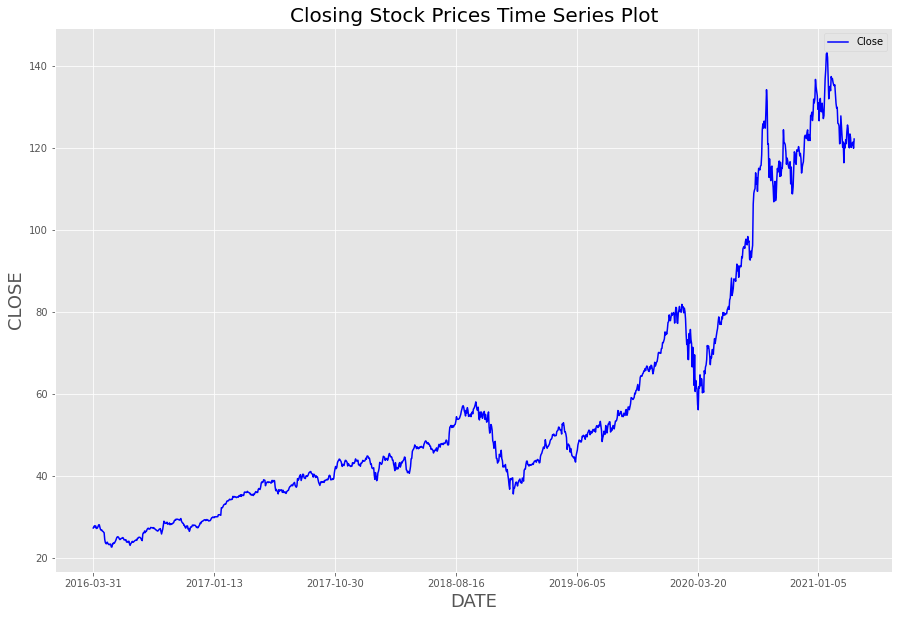

In [5]:
axl = df.plot(kind='line', x='Date', y='Close', color='blue', figsize=(15, 10))
plt.title('Closing Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('CLOSE', size=18)

In [6]:
adFuller = adfuller(df['Close'].values, autolag='AIC')
print(f'P value = {adFuller[1]}')

P value = 0.9687749672641794


In [7]:
df['lag1'] = df['Close'].pct_change(1) 
df['lag2'] = df['Close'].pct_change(2)

Text(0, 0.5, 'lag1')

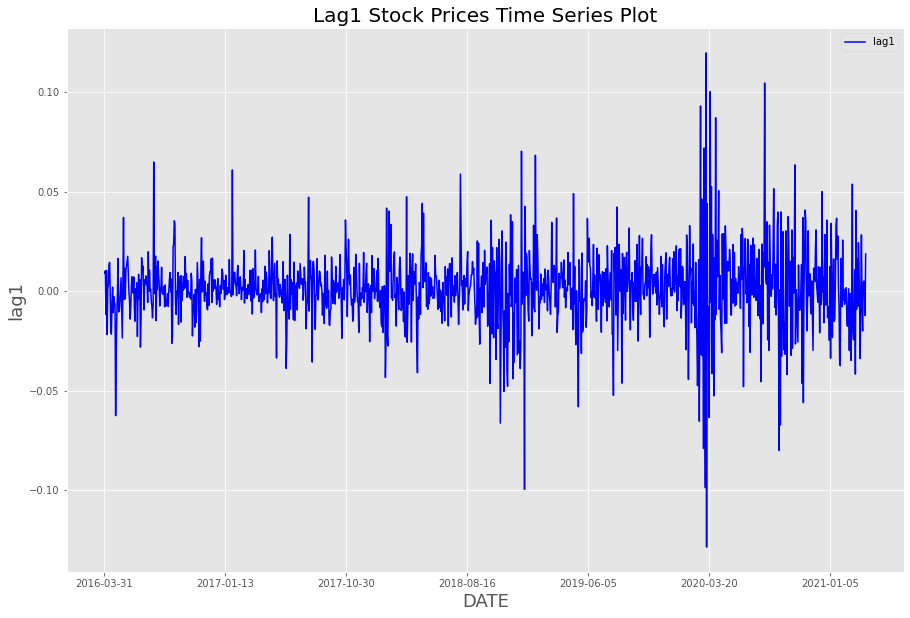

In [8]:
axl = df.plot(kind='line', x='Date', y='lag1', color='blue', figsize=(15, 10))
plt.title('Lag1 Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('lag1', size=18)

In [9]:
adFuller = adfuller(df['lag1'].dropna().values, autolag='AIC')
print(f'P value = {adFuller[1]}')

P value = 1.6241502212702988e-19


Text(0, 0.5, 'lag2')

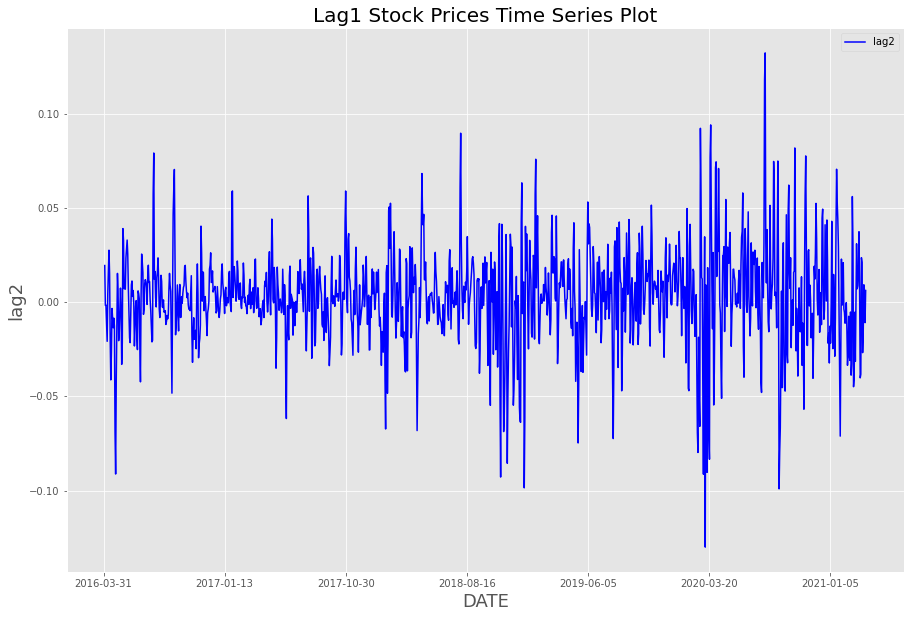

In [10]:
axl = df.plot(kind='line', x='Date', y='lag2', color='blue', figsize=(15, 10))
plt.title('Lag1 Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('lag2', size=18)

In [11]:
adFuller = adfuller(df['lag2'].dropna().values, autolag='AIC')
print(f'P value = {adFuller[1]}')

P value = 3.6941663706432114e-10


In [12]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,lag1,lag2
0,2016-03-31,27.475000,27.219999,27.430000,27.247499,103553600.0,25.343138,NaN,NaN
1,2016-04-01,27.500000,27.049999,27.195000,27.497499,103496000.0,25.575666,0.009175,NaN
2,2016-04-04,28.047501,27.567499,27.605000,27.780001,149424800.0,25.838421,0.010274,0.019543
3,2016-04-05,27.682501,27.355000,27.377501,27.452499,106314800.0,25.533810,-0.011789,-0.001637
4,2016-04-06,27.745001,27.299999,27.557501,27.740000,105616400.0,25.801216,0.010473,-0.001440
...,...,...,...,...,...,...,...,...,...
1255,2021-03-25,121.660004,119.000000,119.540001,120.589996,98844700.0,120.589996,0.004164,-0.015913
1256,2021-03-26,121.480003,118.919998,120.349998,121.209999,93958900.0,121.209999,0.005141,0.009326
1257,2021-03-29,122.580002,120.730003,121.650002,121.389999,80819200.0,121.389999,0.001485,0.006634
1258,2021-03-30,120.400002,118.860001,120.110001,119.900002,85671900.0,119.900002,-0.012274,-0.010808


##ARIMA model

Train and Validation split <br>
The first 80% of the time series (1000 observations) are used as training data. Here is a plot of the autocorrelation function as generated on this training set.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


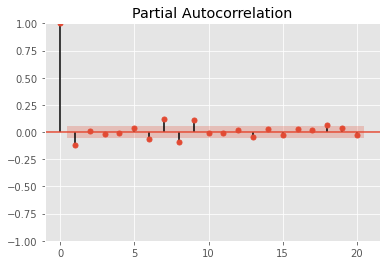

In [15]:
pacf = plot_pacf(df['lag1'].dropna(), lags = 20)

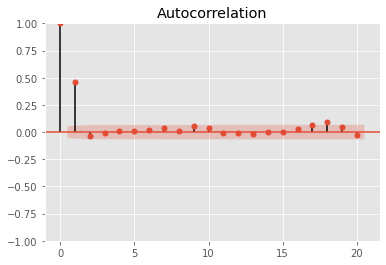

In [16]:
acf = plot_acf(df['lag2'].dropna(), lags = 20)

In [17]:
df = df[['Date', 'Close']]

In [18]:
df.set_index('Date', inplace = True)

In [19]:
df

,Close
Date,
2016-03-31,27.247499
2016-04-01,27.497499
2016-04-04,27.780001
2016-04-05,27.452499
2016-04-06,27.740000
...,...
2021-03-25,120.589996
2021-03-26,121.209999
2021-03-29,121.389999


In [48]:
Arima_model=pm.auto_arima(df['Close'], start_p=0, start_q=0, max_p=10, max_q=10, start_d = 0, max_d = 5, start_P=0, start_Q=0, max_P=10, max_Q=10, stepwise=True, seasonal=True, information_criterion='aic', trace=True, error_action='warn', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7063.524, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7058.895, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7059.015, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7063.145, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7060.673, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7056.024, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7057.988, Time=0.99 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7057.976, Time=0.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7060.982, Time=0.42 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7056.058, Time=1.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7055.791, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7058.890, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7058.755, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7057.734, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [180]:
print(Arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -2586.015
Date:                Thu, 04 Nov 2021   AIC                           5176.030
Time:                        14:37:10   BIC                           5185.843
Sample:                             0   HQIC                          5179.760
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0947      0.018     -5.281      0.000      -0.130      -0.060
sigma2        10.3742      0.120     86.761      0.000      10.140      10.609
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [181]:
prediction = Arima_model.predict(n_periods=260)

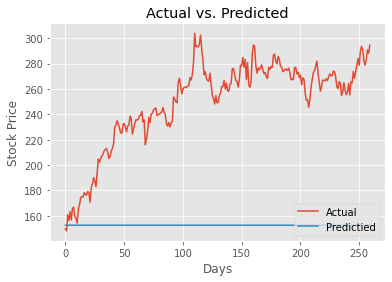

In [182]:
plt.plot(test)
plt.plot(prediction)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend(["Actual", "Predictied"], loc ="lower right") 
plt.title("Actual vs. Predicted")
plt.show()

In [210]:
train = df[0:1200]

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Close'][0:1200], order=(9,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1200
Model:                 ARIMA(9, 1, 1)   Log Likelihood               -2020.231
Date:                Thu, 04 Nov 2021   AIC                           4062.462
Time:                        17:33:56   BIC                           4118.443
Sample:                             0   HQIC                          4083.551
                               - 1200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1770      0.152     -1.161      0.246      -0.476       0.122
ar.L2          0.0130      0.020      0.640      0.522      -0.027       0.053
ar.L3          0.0005      0.017      0.027      0.9

In [23]:
predict = model_fit.predict(start = 0, end = len(df)-1, dynamic = False)

In [31]:
df['predict'] = predict.values
df

,Close,predict
Date,,
2016-03-31,27.247499,0.000000
2016-04-01,27.497499,27.247493
2016-04-04,27.780001,27.464770
2016-04-05,27.452499,27.753563
2016-04-06,27.740000,27.502749
...,...,...
2021-03-25,120.589996,129.753223
2021-03-26,121.209999,129.753029
2021-03-29,121.389999,129.753184


In [32]:
test = df[1200:]
rmse = sqrt(mean_squared_error(test['Close'], test['predict']))
r2 = r2_score(test['Close'], test['predict'], multioutput='variance_weighted')
print(f'RMSE Error = {rmse}, R2_Score = {r2}')

RMSE Error = 6.9019252874527215, R2_Score = -0.04306897053407588


In [33]:
df.reset_index(inplace = True)
df

,Date,Close,predict
0,2016-03-31,27.247499,0.000000
1,2016-04-01,27.497499,27.247493
2,2016-04-04,27.780001,27.464770
3,2016-04-05,27.452499,27.753563
4,2016-04-06,27.740000,27.502749
...,...,...,...
1255,2021-03-25,120.589996,129.753223
1256,2021-03-26,121.209999,129.753029
1257,2021-03-29,121.389999,129.753184
1258,2021-03-30,119.900002,129.753082


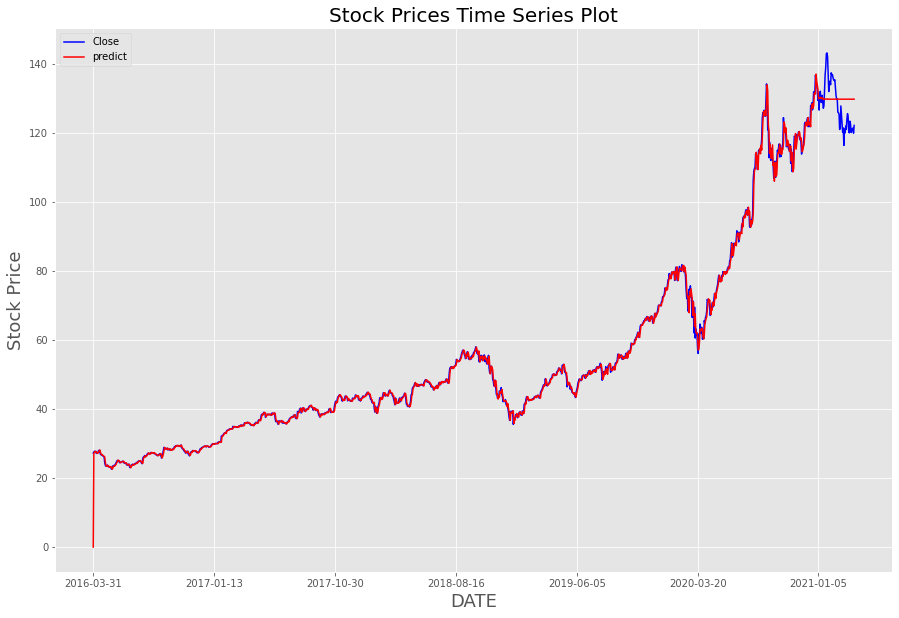

In [34]:
axl = df.plot(kind='line', x='Date', y='Close', color='blue', figsize=(15, 10))
df.plot(kind='line', x='Date', y='predict', color='red', figsize=(15, 10), ax = axl)
plt.title('Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('Stock Price', size=18)
plt.legend()
plt.show()

##LSTM

In [35]:
train = df['Close'][0:1125].values
test = df['Close'][1125:].values

In [36]:
train_size = len(train)
test_size = len(test)

In [37]:
train = np.expand_dims(train,axis=1)
test = np.expand_dims(test,axis=1)

In [38]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [41]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)

In [42]:
test = scaler.fit_transform(test)

In [43]:
lookback = 5
X_train, Y_train = create_dataset(train, lookback)
X_test, Y_test = create_dataset(test, lookback)

In [44]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1119, 5) (1119,) (129, 5) (129,)


In [45]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1119, 1, 5) (1119,) (129, 1, 5) (129,)


In [46]:
# Generate LSTM network
model = keras.models.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(1, lookback)))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.1, epochs=100, batch_size=8, verbose=2)

Epoch 1/100
126/126 - 2s - loss: 0.0790 - val_loss: 0.4770
Epoch 2/100
126/126 - 0s - loss: 0.0235 - val_loss: 0.2495
Epoch 3/100
126/126 - 0s - loss: 0.0144 - val_loss: 0.1506
Epoch 4/100
126/126 - 0s - loss: 0.0097 - val_loss: 0.0753
Epoch 5/100
126/126 - 0s - loss: 0.0057 - val_loss: 0.0355
Epoch 6/100
126/126 - 0s - loss: 0.0030 - val_loss: 0.0163
Epoch 7/100
126/126 - 0s - loss: 0.0013 - val_loss: 0.0059
Epoch 8/100
126/126 - 0s - loss: 6.1524e-04 - val_loss: 0.0026
Epoch 9/100
126/126 - 0s - loss: 3.4889e-04 - val_loss: 0.0016
Epoch 10/100
126/126 - 0s - loss: 2.7050e-04 - val_loss: 0.0014
Epoch 11/100
126/126 - 0s - loss: 2.4538e-04 - val_loss: 0.0013
Epoch 12/100
126/126 - 0s - loss: 2.3314e-04 - val_loss: 0.0014
Epoch 13/100
126/126 - 0s - loss: 2.2637e-04 - val_loss: 0.0015
Epoch 14/100
126/126 - 0s - loss: 2.1580e-04 - val_loss: 0.0015
Epoch 15/100
126/126 - 0s - loss: 2.1002e-04 - val_loss: 0.0017
Epoch 16/100
126/126 - 0s - loss: 1.9953e-04 - val_loss: 0.0019
Epoch 17/100


dict_keys(['loss', 'val_loss'])


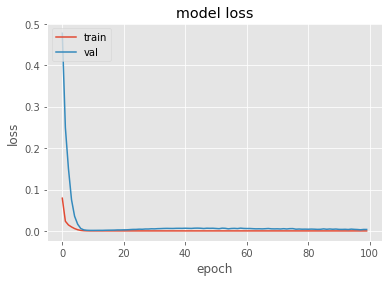

In [47]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [49]:
test_prediction = model.predict(X_test)
test_prediction = scaler.inverse_transform(test_prediction)
Y_test = scaler.inverse_transform([Y_test])

In [50]:
test_prediction.shape

(129, 1)

In [51]:
Y_test.shape

(1, 129)

In [52]:
Y_test = Y_test.reshape(-1)
test_prediction = test_prediction.reshape(-1)

No handles with labels found to put in legend.


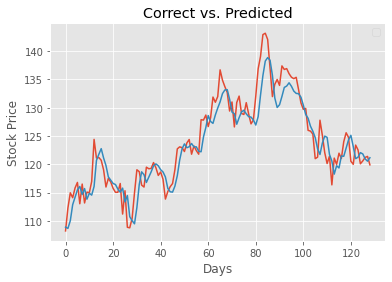

In [56]:
plt.plot(Y_test)
plt.plot(test_prediction)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title("Correct vs. Predicted")
plt.legend()
plt.show()

In [57]:
mse = mean_squared_error(Y_test, test_prediction)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2.930465


##Prophet

In [58]:
pip install fbprophet

In [59]:
from fbprophet import Prophet

In [60]:
my_model = Prophet(interval_width=0.95)

In [61]:
df

,Date,Close,predict
0,2016-03-31,27.247499,0.000000
1,2016-04-01,27.497499,27.247493
2,2016-04-04,27.780001,27.464770
3,2016-04-05,27.452499,27.753563
4,2016-04-06,27.740000,27.502749
...,...,...,...
1255,2021-03-25,120.589996,129.753223
1256,2021-03-26,121.209999,129.753029
1257,2021-03-29,121.389999,129.753184
1258,2021-03-30,119.900002,129.753082


In [62]:
df.drop(columns = ['predict'], inplace = True)
df.columns = ['ds', 'y']

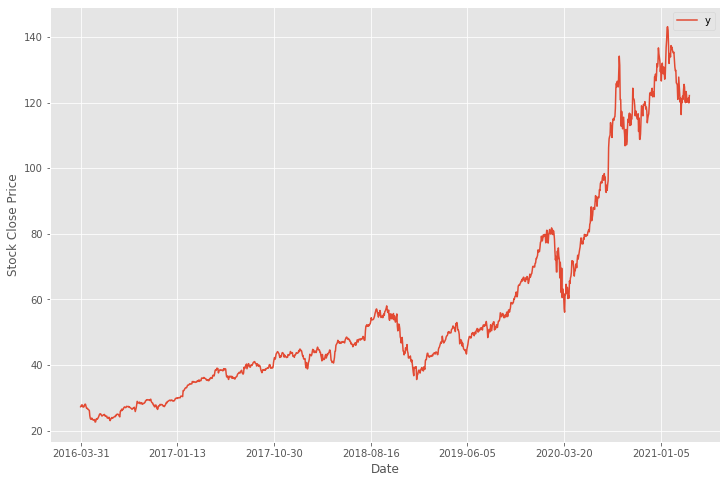

In [63]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Stock Close Price')
ax.set_xlabel('Date')
plt.show()

In [64]:
my_model = Prophet(interval_width=0.95)

In [65]:
train = df[:1125]
test = df[1125:]

In [66]:
my_model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
df

,ds,y
0,2016-03-31,27.247499
1,2016-04-01,27.497499
2,2016-04-04,27.780001
3,2016-04-05,27.452499
4,2016-04-06,27.740000
...,...,...
1255,2021-03-25,120.589996
1256,2021-03-26,121.209999
1257,2021-03-29,121.389999
1258,2021-03-30,119.900002


In [68]:
future_dates = my_model.make_future_dataframe(periods=135, freq='B')
future_dates.tail()

,ds
1255,2021-03-18
1256,2021-03-19
1257,2021-03-22
1258,2021-03-23
1259,2021-03-24


In [69]:
forecast = my_model.predict(future_dates)

In [70]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-31,31.759731,18.335315,34.010384,31.759731,31.759731,-6.130664,-6.130664,-6.130664,0.964330,0.964330,0.964330,-7.094994,-7.094994,-7.094994,0.0,0.0,0.0,25.629068
1,2016-04-01,31.684909,17.830677,33.616821,31.684909,31.684909,-6.066127,-6.066127,-6.066127,0.939799,0.939799,0.939799,-7.005927,-7.005927,-7.005927,0.0,0.0,0.0,25.618782
2,2016-04-04,31.460442,18.289431,33.265591,31.460442,31.460442,-5.819124,-5.819124,-5.819124,0.905375,0.905375,0.905375,-6.724499,-6.724499,-6.724499,0.0,0.0,0.0,25.641318
3,2016-04-05,31.385620,18.215430,33.626136,31.385620,31.385620,-5.610737,-5.610737,-5.610737,1.021765,1.021765,1.021765,-6.632502,-6.632502,-6.632502,0.0,0.0,0.0,25.774883
4,2016-04-06,31.310798,18.015430,32.964863,31.310798,31.310798,-5.472627,-5.472627,-5.472627,1.071553,1.071553,1.071553,-6.544180,-6.544180,-6.544180,0.0,0.0,0.0,25.838171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2021-03-18,134.041058,106.163473,151.106925,111.878419,155.262995,-5.949830,-5.949830,-5.949830,0.964330,0.964330,0.964330,-6.914159,-6.914159,-6.914159,0.0,0.0,0.0,128.091228
1256,2021-03-19,134.194416,104.603428,151.388984,111.853958,155.610708,-6.117159,-6.117159,-6.117159,0.939799,0.939799,0.939799,-7.056958,-7.056958,-7.056958,0.0,0.0,0.0,128.077257
1257,2021-03-22,134.654488,104.605759,150.264062,111.782760,156.653850,-6.438216,-6.438216,-6.438216,0.905375,0.905375,0.905375,-7.343591,-7.343591,-7.343591,0.0,0.0,0.0,128.216273
1258,2021-03-23,134.807846,104.063827,151.938508,111.801246,157.001563,-6.370530,-6.370530,-6.370530,1.021765,1.021765,1.021765,-7.392294,-7.392294,-7.392294,0.0,0.0,0.0,128.437317


In [71]:
predicted = forecast['yhat'][1125:]

In [72]:
from math import sqrt
error = sqrt(mean_squared_error(test['y'], predicted))
print('Test RMSE: %.3f' % error)

Test RMSE: 6.447


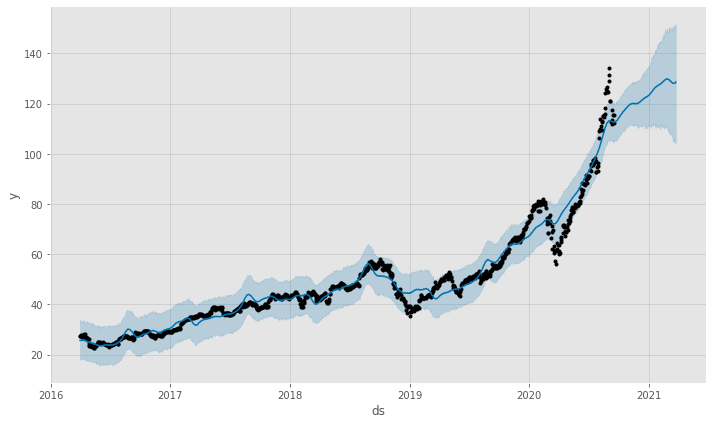

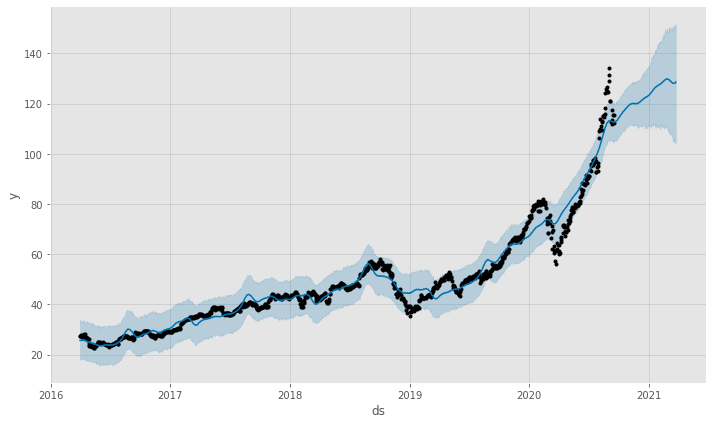

In [73]:
my_model.plot(forecast, uncertainty=True)

#**Conclusion** LSTM Model RMSE is lowest for test dataset. This shows LSTM model best fits the given Stock prices